# Epilepsi Kriz Tahmini


#### Ozar Ömer Uncu - 21727815 
#### Uğurcan Bağrıyanık - 21526701


Bu projede, epileptik nöbet tespiti özelliğine sahip, çok yaygın olarak kullanılan bir veri setinin önceden işlenmiş ve yeniden yapılandırılmış / yeniden şekillendirilmiş versiyonunu kullandık. Her veri noktası, zaman içinde farklı bir noktadaki EEG kaydının değeridir.
* EGG (elektroensefalogram), kafa derinize takılı küçük, metal diskler (elektrotlar) kullanarak beyninizdeki elektriksel aktiviteyi tespit eden bir testtir.

Epileptik nöbet geçirme ya da geçirmeme şeklinde 5 tip reaksiyonumuz var. 4 tip reaksiyonda nöbet yok, sadece kişinin çeşitli özelliklerine göre nöbet var. Veri setimizi epileptik nöbet geçirip geçirmemek olarak küçülteceğiz. Projede çeşitli sınıflandırma yöntemlerini (RandomForestClassifier, KNeighborsClassifier, SVM, Decision Tree Classifier, XGBClassifier) ​​kullandık ve karşılaştırdık. En iyi doğruluk puanına katkıda bulunacak olanı seçtik.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

%matplotlib inline

bold text## İçerik

[Amaç](#purpose)   
[Verinin Anlaşılması](#data_understanding)   
[Verilerin Hazırlanması](#data_preparation)   
[Modeling for Clustering](#clusteringmodel)  
[Clustering results](#clustering)    
[Modeling for Classification](#classificationmodel)  
[Evaluation](#evaluation)  
[References](#references)   


## Purpose <a class="anchor" id="purpose"></a>

Epilepsi, dünya çapında 65 milyon insanı etkileyen oldukça yaygın bir nörolojik hastalıktır. Herkes epilepsi geçirebilir, ancak küçük çocuklarda ve yaşlı yetişkinlerde daha yaygındır. Erkeklerde kadınlara göre biraz daha fazla görülür.


Bu deneyde insanlara, epilepsi nöbeti tespit etmenin makine öğrenimi yöntemleriyle mümkün olabileceğini göstermek istiyoruz. Bu notebook, 178 veri kolonundan tahminler sağlar.
Ayrıca PCA yöntemi ile birden fazla kolonu birleştirme avantajına sahibiz.Bu notebook aynı zamanda nörologların iş yükünün azaltılmasına da katkıda bulunuyor.
Sorunun çözümüne katkı sağlamaz, ancak bazı sınıfların verilerden daha kolaylıkla algılanmasına yardımcı olabilir.



## Verinin Anlaşılması<a class="anchor" id="data_understanding"></a>

Aşağıda görebileceğiniz gibi veri setimizi öncelikle csv uzantılı dosyadan okuyoruz. Dataframe'i panda dataframe'e çeviriyoruz. Ve sonra EEG sonuçlarının  dağılımını göstermek istiyoruz. Görebiliyoruz ki, dataframe'imizde aynı miktarda sınıfımız var. Bunu grafiğin altındaki tablodan da söyleyebiliriz. Y sütun verilerimizin ortalamasının 3'e eşit olduğunu görebilirsiniz.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


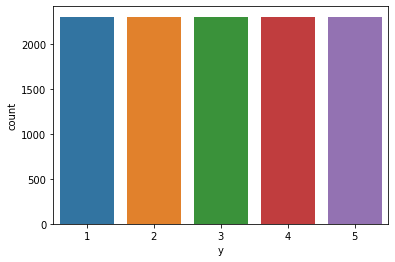

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,-5.827478,-6.042174,-6.687304,-7.088870,-7.211217,-7.088261,-6.806696,-6.744696,-6.484783,-6.448435,-6.355391,-6.543130,-6.884348,-6.883217,-6.118870,-5.15913,-4.785652,-4.874783,-5.393565,-5.935478,-6.349913,-6.212522,-5.859826,-5.299826,-4.955652,-5.278087,-6.162261,-7.316609,-7.998522,-7.818870,...,-6.997304,-7.339391,-7.911565,-8.177304,-8.608870,-8.578087,-8.240000,-7.691391,-7.356522,-7.228783,-6.980870,-6.756783,-6.355304,-6.423826,-6.465217,-6.316435,-5.808000,-5.255913,-4.682087,-4.638609,-4.770261,-5.650870,-7.170348,-8.759826,-9.784783,-10.096261,-9.842957,-9.701739,-9.351391,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,160.471017,161.181118,165.071121,169.198359,170.641967,168.930355,164.646296,162.062661,162.571333,162.339911,162.823325,163.909723,165.844176,166.009100,164.715153,162.77423,162.902294,164.799831,165.391697,164.291120,163.165167,163.408052,163.561408,162.548119,160.813772,160.441049,162.881958,166.235164,166.314965,164.513017,...,168.567495,168.662705,167.643458,167.414439,167.922773,168.274009,167.808218,166.739558,165.678558,167.130911,168.156296,167.459868,165.061414,164.248830,166.226332,168.143625,167.067064,166.446540,167.554020,169.418457,170.639171,170.817824,168.145372,166.817974,166.999981,167.756860,166.988820,167.062497,166.606345,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,-1765.000000,-1803.000000,-1833.000000,-1867.000000,-1870.000000,-1839.000000,-1867.000000,-1856.000000,-1844.000000,-1717.000000,-1764.000000,-1856.000000,-1844.000000,-1866.000000,-1863.000000,-1866.00000,-1781.000000,-1860.000000,-1818.000000,-1867.000000,-1743.000000,-1517.000000,-1552.000000,-1720.000000,-1864.000000,-1814.000000,-1829.000000,-1851.000000,-1840.000000,-1673.000000,...,-1867.000000,-1826.000000,-1866.000000,-1854.000000,-1789.000000,-1872.000000,-1866.000000,-1675.000000,-1778.000000,-1733.000000,-1862.000000,-1861.000000,-1857.000000,-1839.000000,-1860.000000,-1843.000000,-1863.000000,-1861.000000,-1845.000000,-1820.000000,-1864.000000,-1868.000000,-1855.000000,-1852.000000,-1870.000000,-1847.000000,-1578.000000,-1838.000000,-1763.0000

In [ ]:
df = pd.read_csv("Epileptic Seizure Recognition.csv")
sns.countplot(df['y'],label="Count")
plt.show()
df.describe()


Yukarıda her bir sütunla ilgili genel bilgileri görebilirsiniz. Tablodan minimum, maksimum değerleri görebilirsiniz. Daha sonra, gelecekteki süreçlerimiz için veri hücrelerimizin veri türlerini görmemiz gerekiyor. Veri türlerimizi aşağıda görebilirsiniz. Veritabanında herhangi bir dönüştürmeye ihtiyacımız yok.

In [ ]:
print(df.dtypes)


Unnamed    object
X1          int64
X2          int64
X3          int64
X4          int64
            ...  
X175        int64
X176        int64
X177        int64
X178        int64
y           int64
Length: 180, dtype: object


Amaç bölümünde belirttiğimiz gibi, sınıflarımızı 0 (epileptik nöbet yok) veya 1 (epileptik nöbet geçirme) olarak düşürmemiz gerekiyor. Nöbet olup olmadığını belirlemek için sadece iki özelliğe ihtiyacımız var. Aşağıdaki grafikten nöbet geçirip geçirmeme dağılımını görebilirsiniz. Grafikten görüyoruz ki nöbet geçirmeyenler 4 nöbet geçirenlere göre 4 kat daha fazla.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


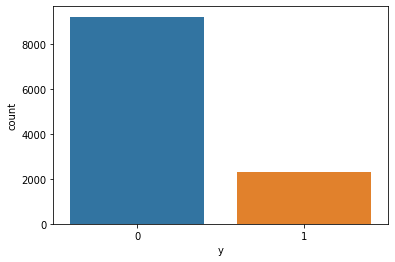

In [ ]:
#change values to have epileptic seizure or not 
df['y'] = np.where(df['y'] >1, 0,  1)
df.y.value_counts()
df_type = df.y
sns.countplot(df.y,label="Count")
plt.show()


## Verilerin Hazırlanması<a class="anchor" id="data_preparation"></a>

In [ ]:
df.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

Öncelikle sınıf sütunumuzu bırakıp yeni bir dataframe'e atamamız gerekiyor. İleriki süreçlerde, tahmin edilen değerleri karşılaştırmak için bu sütuna ihtiyacımız var. Verimizde eksik değer bulunmadığından herhangi bir satır düşürmedik. Yukarıda görebilirsiniz.

In [ ]:
df.head(20)
df_droppep = df.drop(["y","Unnamed"],axis = 1)


### Kolonlar arası ilişki
Aşağıda yer alan heatmap'den sütunlar arasındaki korelasyonları görebiliriz. Bu heatmap'i önce silinen sütunlara koyarız, ancak daha sonra genellikle kolonlar arasında yüksek ilişkiler yoktur, bu yüzden hepsini korumayı seçiyoruz. Bu sorunu daha sonra ele alacağız. 

    X1   X2   X3   X4   X5   X6   X7  ...  X172  X173  X174  X175  X176  X177  X178
0  135  190  229  223  192  125   55  ...   -31   -77  -103  -127  -116   -83   -51
1  386  382  356  331  320  315  307  ...   146   152   157   156   154   143   129
2  -32  -39  -47  -37  -32  -36  -57  ...    48    19   -12   -30   -35   -35   -36

[3 rows x 178 columns]


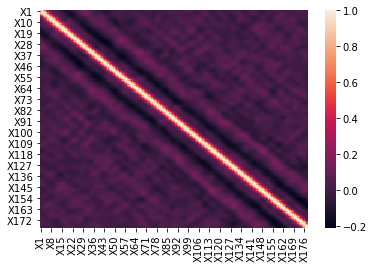

In [ ]:
label_encoder = LabelEncoder()
df.iloc[:,0] = label_encoder.fit_transform(df.iloc[:,0])
corr = df_droppep.corr()
sns.heatmap(corr)
print(df_droppep.head(3))

Verilerimizi normalleştirmemiz gerekiyor çünkü veri setimizde çok sayıda negatif değer var. Hatalar yaratabilir veya istenmeyen tahminler sağlayabilir. Verimiz için Min-max normalizasyonu seçiyoruz.
*   **Min-max normalization** ayrıca min-maks ölçeklendirme veya min-maks normalleştirme olarak da bilinir, en basit yöntemdir ve aralığı [0, 1] veya [−1, 1] 'de ölçeklendirmek için özellik aralığının yeniden ölçeklendirilmesinden oluşur.
Hedef aralığın seçilmesi verilerin yapısına bağlıdır. Genel formül
olarak verilen: 𝑥'=𝑥−𝑚𝑖𝑛(𝑥)/(𝑚𝑎𝑥(𝑥)−𝑚𝑖𝑛(𝑥))
burada " x " orijinal değerdir, " x' " ler normalleştirilmiş değerdir.

Verilerimizin MinMaxScaler ile  nasıl değiştiğini görebilirsiniz.




In [ ]:
scalar = MinMaxScaler() 
scalar.fit(df_droppep)
ND = scalar.transform(df_droppep)
ND = pd.DataFrame(ND)
print(df_droppep.head())
print(ND.head())


    X1   X2   X3   X4   X5   X6   X7  ...  X172  X173  X174  X175  X176  X177  X178
0  135  190  229  223  192  125   55  ...   -31   -77  -103  -127  -116   -83   -51
1  386  382  356  331  320  315  307  ...   146   152   157   156   154   143   129
2  -32  -39  -47  -37  -32  -36  -57  ...    48    19   -12   -30   -35   -35   -36
3 -105 -101  -96  -92  -89  -95 -102  ...   -80   -77   -85   -77   -72   -69   -65
4   -9  -65  -98 -102  -78  -48  -16  ...   -12   -32   -41   -65   -83   -89   -73

[5 rows x 178 columns]
        0         1         2    ...       175       176       177
0  0.553717  0.571107  0.584371  ...  0.434953  0.435612  0.474893
1  0.624123  0.625176  0.620328  ...  0.505486  0.495495  0.522970
2  0.506872  0.506618  0.506229  ...  0.456113  0.448331  0.478900
3  0.486396  0.489158  0.492356  ...  0.446447  0.439322  0.471154
4  0.513324  0.499296  0.491789  ...  0.443574  0.434022  0.469017

[5 rows x 178 columns]



## Modelleme <a class="anchor" id="classificationmodel"></a>

In [ ]:
class_X = df_droppep.copy()
class_y = df_type
X_train,X_test,y_train,y_test = train_test_split(class_X,class_y,test_size =0.30)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Önce eğitim ve test değerlerimiz için verilerimizi %70 ve %30'a böldük. Tüm sınıflandırıcı yöntemlere aynı işlemi almak için dizi oluşturuyoruz. Eğitim ve test verilerimizle 5 farklı sınıflandırma modeli karşılaştırıyoruz. Bu yöntemler hakkında küçük açıklamalar verelim.


* XGBoost, eXtreme Gradient Boosting anlamına gelir;
gradient boosted decision trees algoritmasına dayalı algoritma. XGBoost, overfittingi azaltmak için daha iyi bir düzenleme tekniği uygular ve gradyan artırmanın farklarından biridir.
---
* Uygulama libsvm'ye dayanmaktadır. Uyum süresi, numune sayısı ile en azından ikinci dereceden ölçeklenir ve on binlerce numunenin fazlasında pratik olmayabilir. Büyük veri kümeleri için, muhtemelen bir Nystroem transformatöründen sonra, LinearSVC veya SGDClassifier kullanmayı düşünün.
---
*  Karar ağacı, bir iç düğümün özelliği (veya özniteliği) temsil ettiği, dalın bir karar kuralını temsil ettiği ve her düğümün sonucu temsil ettiği akış şemasına benzer bir ağaç yapısıdır. Bir karar ağacındaki en üst düğüm, kök düğüm olarak bilinir. Öznitelik değerine göre bölümlemeyi öğrenir. Ağacı, özyinelemeli bölümleme çağrısı ile özyinelemeli olarak böler.
---
*   Random forests ya da random decision forests, eğitim zamanında çok sayıda karar ağacı oluşturarak ve sınıfların modu (sınıflandırma) veya bireyin ortalama / ortalama tahmini (regresyon) olan sınıfı çıkararak çalışan sınıflandırma, regresyon ve diğer görevler için toplu bir öğrenme yöntemidir. ağaçlar.
---
*   KNN parametrik olmayan ve tembel bir öğrenme algoritmasıdır. Parametrik olmayan, temel veri dağıtımı için herhangi bir varsayım olmadığı anlamına gelir. Başka bir deyişle, veri setinden belirlenen model yapısı. Bu, gerçek dünyadaki veri kümelerinin çoğunun matematiksel teorik varsayımları takip etmediği uygulamada çok yardımcı olacaktır.
---
Yukarıda gördüğünüz gibi sınıflandırma yöntemlerinden bahsetmiştik. Bunları aşağıda karşılaştırıyoruz. Veri setimiz için en iyi doğruluk noktasını sağlayan en iyi yöntemi seçmemiz gerekiyor.

In [ ]:
classifiers = []
model1 = xgboost.XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)
model5 = KNeighborsClassifier()
classifiers.append(model5)


for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    print("********************************")


Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) is 0.9623188405797102
********************************
Accuracy of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is 0.9669565217391304
********************************
Accuracy of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, m

Verisetindeki tahminlerimiz için en yüksek nokta 0.9759420289855072 ile Random forests sınıflandırmasını seçtik. Bizim açımızdan bu sınıflandırma yöntemi bize en iyi noktayı veriyor çünkü tahmin için 2 sınıfa ihtiyacımız var. Random forests sınıflandırmasını kullanma avantajlarımız aşağıdaki gibidir:


*   Random forests sürece katılan karar ağaçlarının sayısı nedeniyle oldukça doğru ve sağlam bir yöntem olarak kabul edilmektedir.
*   Overfitting problemi olmaz. Ana sebep şu ki
önyargıları ortadan kaldıran tüm tahminlerin ortalamasını alır.
*  Sınıflandırıcı için en önem arzeden kolonları seçmeye yardımcı olur.


Veri kümemizde çok sayıda sütunumuz var, bu nedenle daha kaliteli sonuçlar elde etmek için bunları birleştirmemiz gerekiyor. Bunun için PCA yöntemini kullanacağız.
*   Gerçek bir koordinat uzayındaki bir nokta koleksiyonunun temel bileşenleri, bir dizi p birim vektörleridir; burada i-inci vektör, ilk i-1 vektörlerine ortogonal iken verilere en iyi uyan bir doğrunun yönüdür.


Bileşenler için ilk grafiği ve ardışık düzenimiz için kaç bileşen oluşturacağımızı seçmek için varyansı yazdırıyoruz. Grafikten de görebileceğiniz gibi, 30 ile 50 arasında bileşen sayısında dirseğimiz var. Dolayısıyla, boru hattı yapımız için 45 bileşen seçebiliriz.



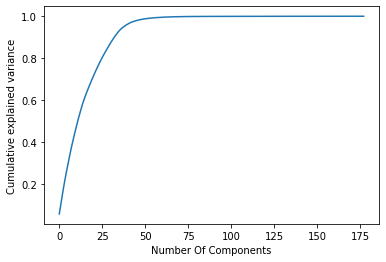

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA(whiten= True).fit(df_droppep)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number Of Components')
plt.ylabel("Cumulative explained variance")
plt.show()


Ardışık düzenimizi PCA ve RandomForestClassifier yöntemleri ile oluşturuyoruz. 45 bileşenli PCA. Ayrıca iki sınıflandırma yöntemi arasındaki farkı görmek istiyoruz. Bu nedenle, ana sınıflandırıcı yöntemimizle karşılaştırmak için SVC'yi seçiyoruz.




In [ ]:
pipe = Pipeline([('pca', PCA(n_components = 45)),('forest', RandomForestClassifier())])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)



rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_vPCA = rfc.predict(X_test)

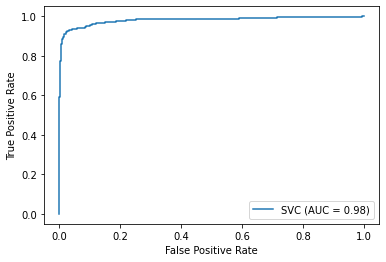

In [ ]:
pipe2 = Pipeline([('pca', PCA(n_components = 45)),('SVC', SVC(random_state=42))])
pipe.fit(X_train,y_train)
y_pred_svc = pipe.predict(X_test)
svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()


## Değerlendirme<a class="anchor" id="evaluation"></a>

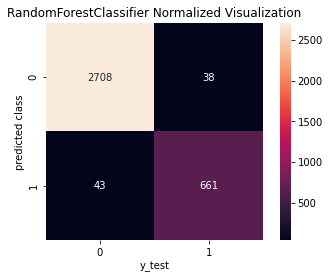

In [ ]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T,square = True , annot = True, fmt = 'd')
plt.title("RandomForestClassifier Normalized Visualization with PCA")
plt.xlabel('y_test')
plt.ylabel('predicted class')
plt.show()

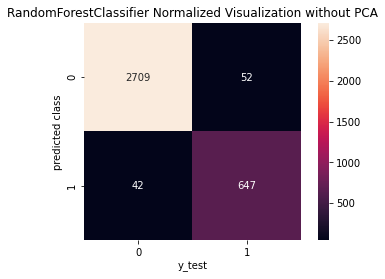

In [ ]:
mat = confusion_matrix(y_test, y_pred_vPCA)
sns.heatmap(mat.T,square = True , annot = True, fmt = 'd')
plt.title("RandomForestClassifier Normalized Visualization without PCA")
plt.xlabel('y_test')
plt.ylabel('predicted class')
plt.show()

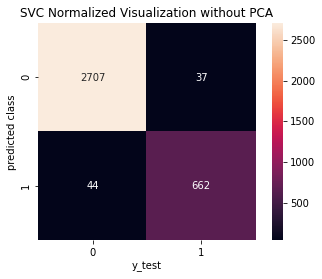

In [ ]:
mat = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(mat.T,square = True , annot = True, fmt = 'd')
plt.title("SVC Normalized Visualization with PCA")
plt.xlabel('y_test')
plt.ylabel('predicted class')
plt.show()

Evaluate your model. Provide results, tables, charts, etc.




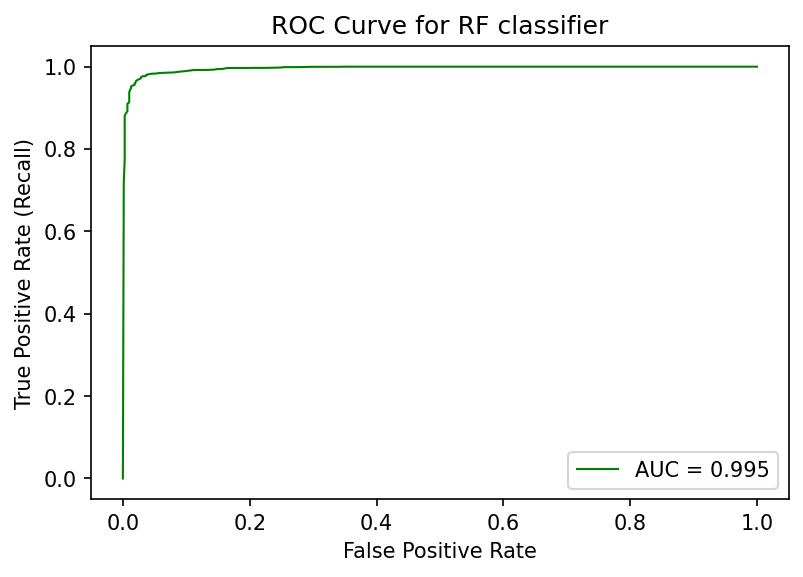

In [ ]:
from sklearn.metrics import roc_curve, auc
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

probas = rf_clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()


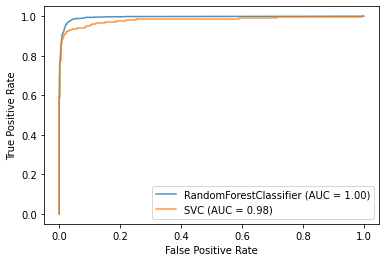

In [ ]:
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()


İki sınıflandırma yöntemini auc skoru ile karşılaştırıyoruz. Daha iyi doğruluğu için daha önce rastgele orman sınıflandırıcısını seçtik. Ancak performanslarında farklılıklar göstermek istiyoruz. Isı haritaları arasındaki farklılıkları da görebilirsiniz. Svc ve randomforest sınıflandırıcı arasında çok az fark vardır.

## Referanslar<a class="anchor" id="references"></a>

**Çalışmamız sırasında kullandığımız tüm kaynaklar.**


*   https://www.kaggle.com/jaketuricchi/using-pca-and-clustering-to-improve-classification
*   https://machinelearningmastery.com/calculate-feature-importance-with-python/#:~:text=Feature%20importance%20refers%20to%20techniques,at%20predicting%20a%20target%20variable.
*   https://www.datacamp.com/community/tutorials/random-forests-classifier-python
*   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
*   https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
*   https://www.kdnuggets.com/2017/06/7-steps-mastering-data-preparation-python.html
*   https://www.kaggle.com/harunshimanto/epileptic-seizure-recognition
*   https://www.healthline.com/health/epilepsy
*   https://www.datatechnotes.com/2019/07/classification-example-with.html
*   https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
*   https://www.datacamp.com/community/tutorials/decision-tree-classification-python
*   https://en.wikipedia.org/wiki/Principal_component_analysis
*   https://medium.com/@gulcanogundur/pca-principal-component-analysis-temel-bile%C5%9Fenler-analizi-bf9098751c62







**Disclaimer!** <font color='grey'>Bu notebook Ozar Ömer Uncu ve Uğurcan Bağrıyanık tarafından **BBM469 - Veri Yoğunluklu Uygulamalar Laboratuvarı** dersi için hazırlandı. Yalnızca eğitim amaçlıdır. Öğrenci çalışması olduğu için sağlanan içeriğin doğruluğu konusunda herhangi bir garanti yoktur.

Herhangi bir telif hakkı ihlali olduğunu düşünüyorsanız, lütfen bize [bildirin](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>